In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

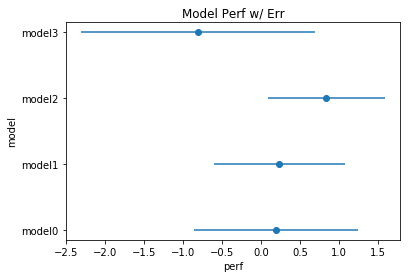

In [2]:
data = {
    'model': ['model%d' % d for d in range(4)],
    'perf': np.random.randn(4),
    'err': np.abs(np.random.randn(4))
}

plt.errorbar('perf', 'model', xerr='err', fmt='o', data=data)
plt.xlabel('perf')
plt.ylabel('model')
plt.title('Model Perf w/ Err')
plt.show()

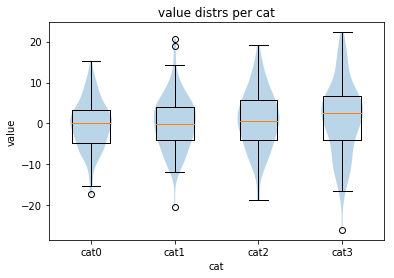

In [3]:
data = [np.random.normal(0, d, 100) for d in range(6, 10)]

plt.violinplot(data, showextrema=False)
plt.boxplot(data)
plt.xticks(ticks=[d + 1 for d in range(len(data))], labels=['cat%d' % d for d in range(len(data))])
plt.xlabel('cat')
plt.ylabel('value')
plt.title('value distrs per cat')
plt.show()

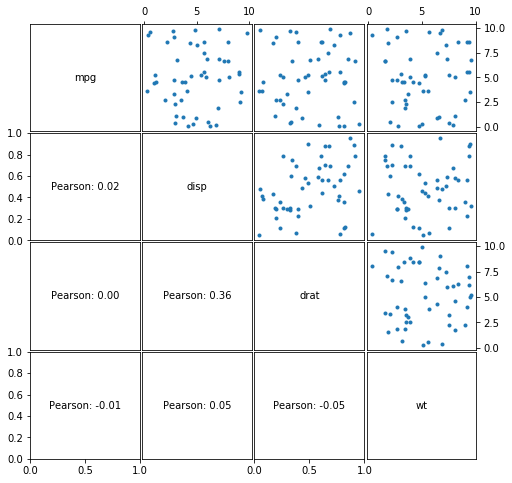

In [4]:
data = 10 * np.random.random((4, 50))
names = ['mpg', 'disp', 'drat', 'wt']

fig, axes = plt.subplots(nrows=data.shape[0], ncols=data.shape[0], figsize=(8,8))
fig.subplots_adjust(hspace=0.02, wspace=0.02)
r = np.corrcoef(data)

for ax in axes.flat:
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    if ax.is_first_col():
        ax.yaxis.set_ticks_position('left')
    if ax.is_last_col():
        ax.yaxis.set_ticks_position('right')
    if ax.is_first_row():
        ax.xaxis.set_ticks_position('top')
    if ax.is_last_row():
        ax.xaxis.set_ticks_position('bottom')

for i in range(len(axes)):
    for j in range(len(axes)):
        if i < j:
            axes[i, j].plot(data[j], data[i], '.')
        if i == j:
            axes[i, i].annotate(names[i], (0.5, 0.5), xycoords='axes fraction', ha='center', va='center')
        if i > j:
            axes[i, j].annotate('Pearson: %.2f' % r[i, j], (0.5, 0.5), xycoords='axes fraction', ha='center', va='center')

for i, j in zip(range(data.shape[0]), itertools.cycle((-1, 0))):
    axes[j,i].xaxis.set_visible(True)
    axes[i,j].yaxis.set_visible(True)
plt.show()